# TITANIC DATASET

**MODELS USED**

- LOGISTIC REGRESSION
- DECISION TREE CLASSIFIER
- RANDOM FOREST CLASSIFIER 
- SUPPORT VECTOR MACHINES(SVM)

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.shape

(891, 12)

In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df_test.shape

(418, 11)

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# EXPLORATORY DATA ANALYSIS

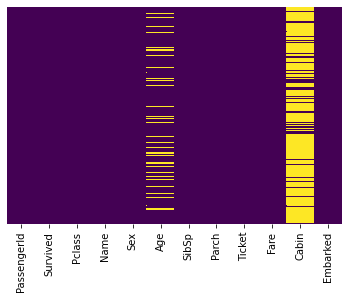

In [13]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

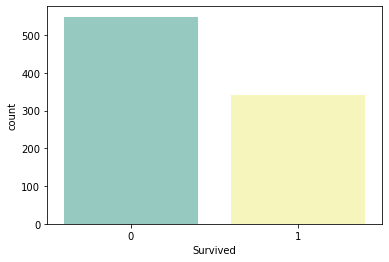

In [14]:
sns.countplot(x='Survived',data=df_train,palette='Set3')

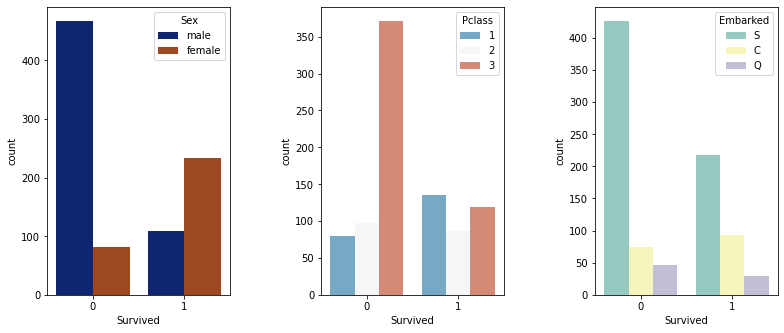

In [15]:
plt.figure(figsize=(18,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
sns.countplot(x='Survived',hue='Sex',data=df_train,palette='dark')
plt.subplot(142)
sns.countplot(x='Survived',hue='Pclass',data=df_train,palette='RdBu_r')
plt.subplot(143)
sns.countplot(x='Survived',hue='Embarked',data=df_train,palette='Set3')

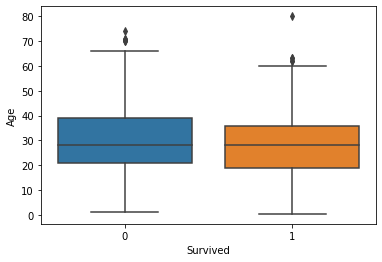

In [16]:

sns.boxplot(x='Survived',y='Age',data=df_train)


Text(0.5, 0, 'Fare')

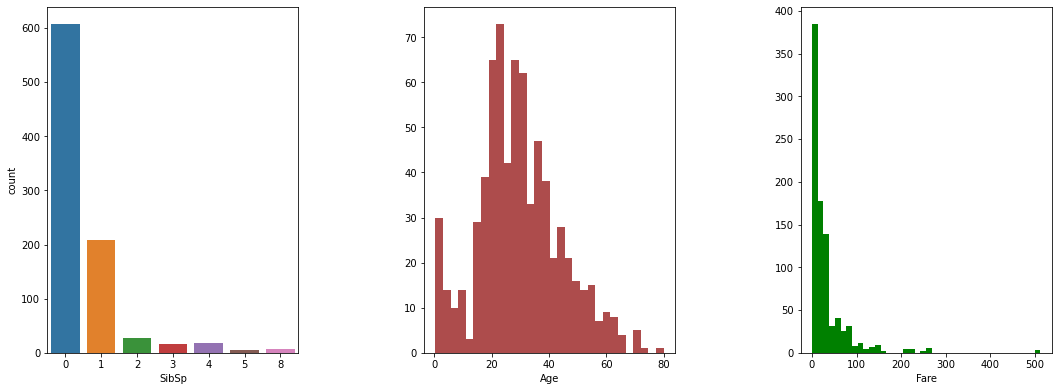

In [17]:
plt.figure(figsize=(18,6))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
sns.countplot(x='SibSp',data=df_train)

plt.subplot(132)
df_train['Age'].hist(bins=30,color='darkred',alpha=0.7,grid=False)
plt.xlabel('Age')

plt.subplot(133)
df_train['Fare'].hist(color='green',bins=40,grid=False)
plt.xlabel('Fare')


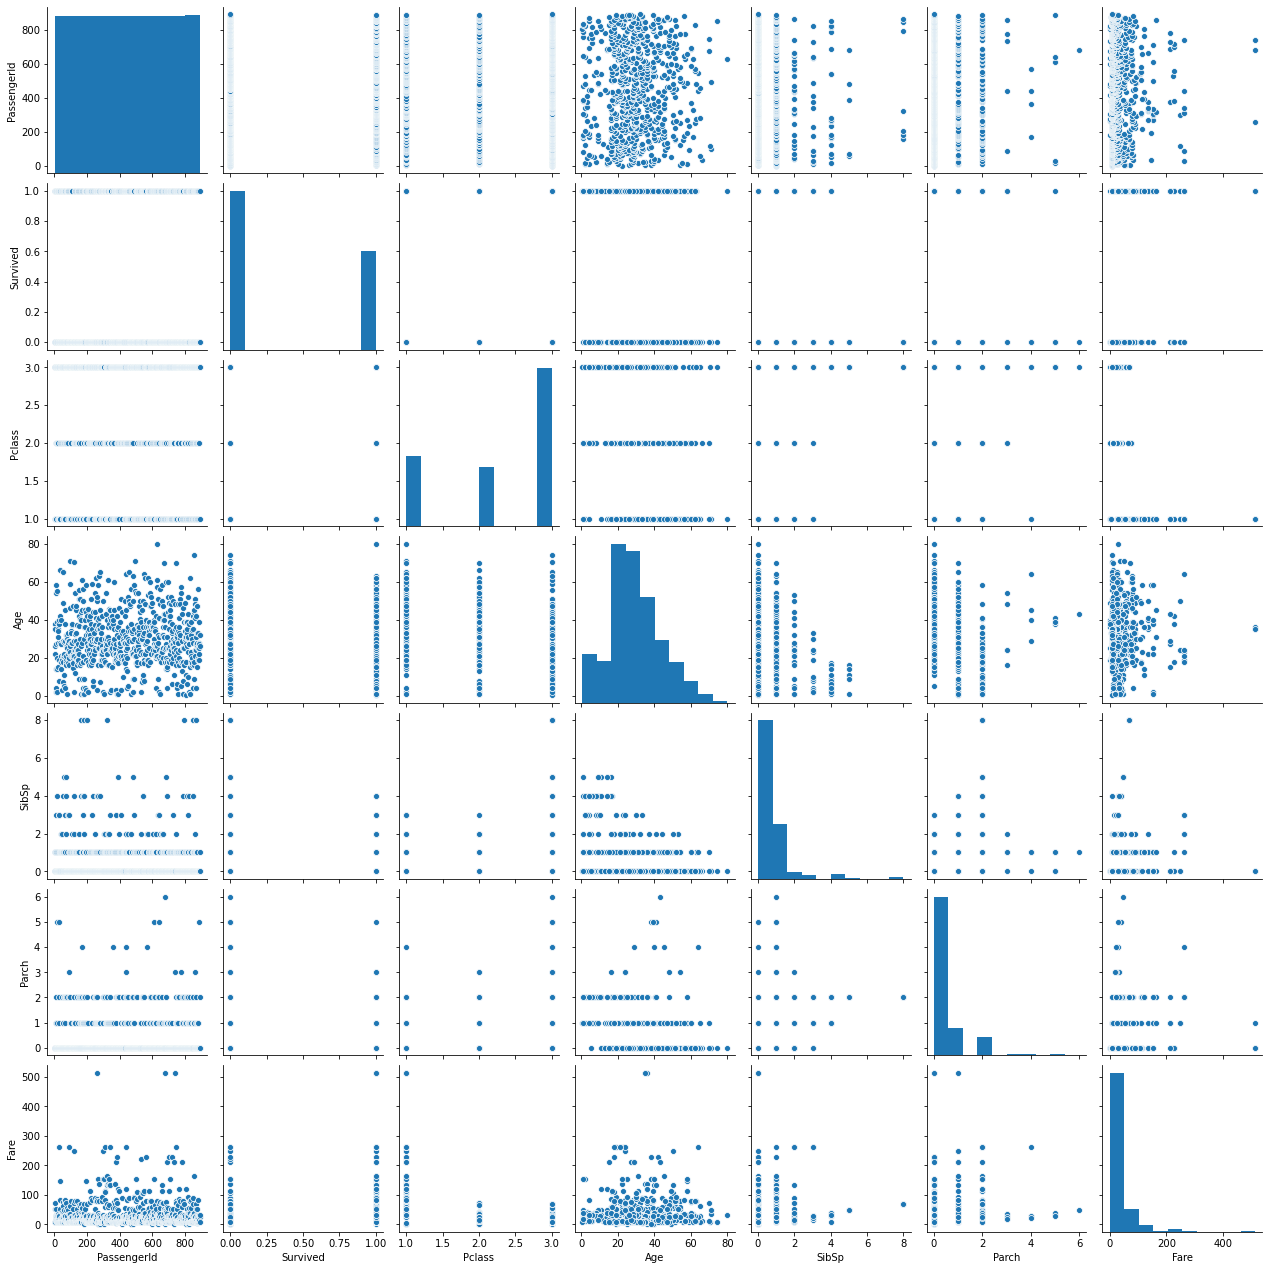

In [18]:
sns.pairplot(df_train)

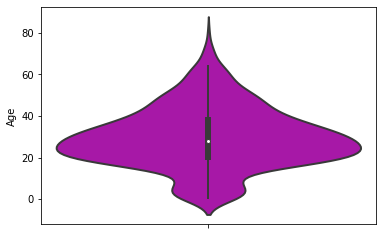

In [19]:
sns.violinplot(y='Age',data=df_train,color='m',linewidth=2)

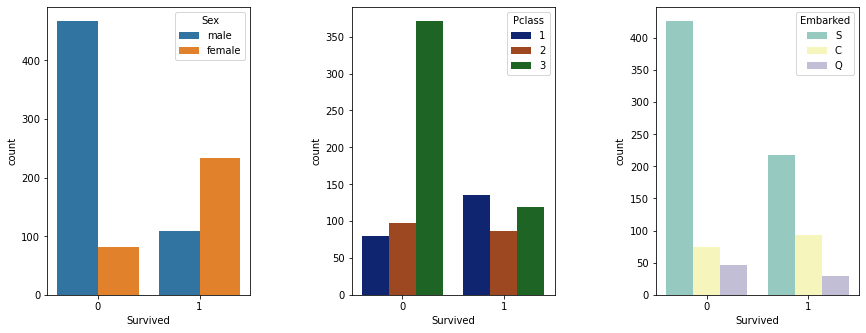

In [20]:
plt.figure(figsize=(20,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
sns.countplot(x='Survived',hue='Sex',data=df_train)
plt.subplot(142)
sns.countplot(x='Survived',hue='Pclass',data=df_train,palette='dark')
plt.subplot(143)
sns.countplot(x='Survived',hue='Embarked',data=df_train,palette='Set3')

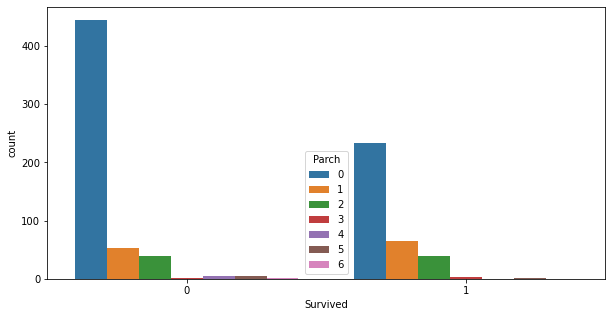

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived',hue='Parch',data=df_train)

# DATA CLEANING AND PREPROCESSING

**For Train Set**

In [22]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
#dropping Cabin Column
df_train.drop('Cabin',axis=1,inplace=True)

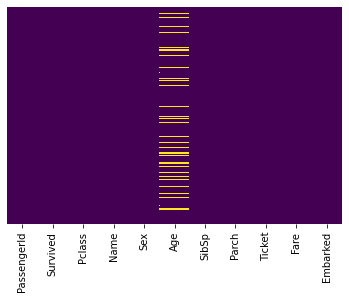

In [24]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Null Value Imputation**

- As we see Age column has null values, we can smartly impute the null values with the mean age corresponding to the "Pclass" of the person. So, first finding the means with respect to the Pclass and then impute the null values with the mean of Age of corresponding value of "Pclass".

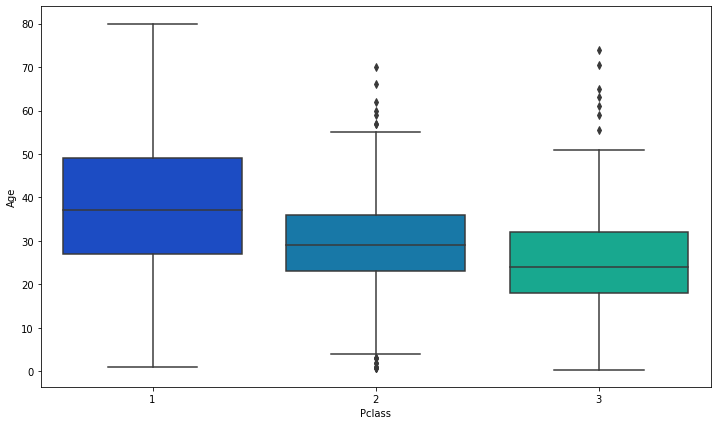

In [25]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

In [26]:
print("mean of AGE for Pclass=1  ",df_train[df_train['Pclass']==1]['Age'].mean())
print("mean of AGE for Pclass=2  ",df_train[df_train['Pclass']==2]['Age'].mean())
print("mean of AGE for Pclass=3  ",df_train[df_train['Pclass']==3]['Age'].mean())

mean of AGE for Pclass=1   38.233440860215055
mean of AGE for Pclass=2   29.87763005780347
mean of AGE for Pclass=3   25.14061971830986


In [27]:
#impute_age function impute mean_age with respect to corresponding Pclass

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [28]:
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)

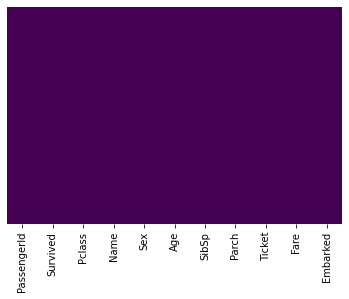

In [29]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
df_train.fillna(method='ffill',inplace=True)

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


**For Test Set**

In [32]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
#dropping Cabin Column
df_test.drop('Cabin',axis=1,inplace=True)

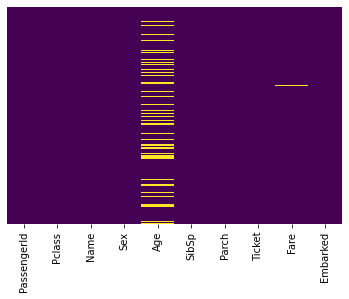

In [34]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

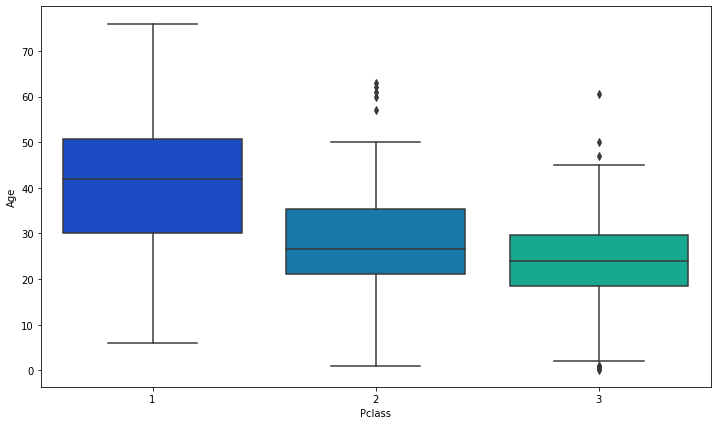

In [35]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_test,palette='winter')

In [36]:
print("mean of AGE for Pclass=1  ",df_test[df_test['Pclass']==1]['Age'].mean())
print("mean of AGE for Pclass=2  ",df_test[df_test['Pclass']==2]['Age'].mean())
print("mean of AGE for Pclass=3  ",df_test[df_test['Pclass']==3]['Age'].mean())

mean of AGE for Pclass=1   40.91836734693877
mean of AGE for Pclass=2   28.7775
mean of AGE for Pclass=3   24.02794520547945


In [37]:
#impute_age function impute mean_age with respect to corresponding Pclass

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 40

        elif Pclass == 2:
            return 28

        else:
            return 24

    else:
        return Age

In [38]:
df_test['Age'] = df_test[['Age','Pclass']].apply(impute_age,axis=1)

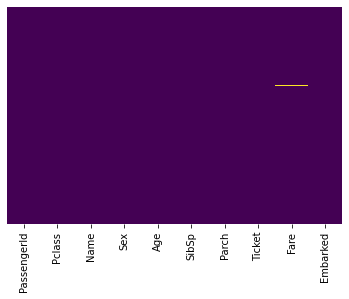

In [39]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [40]:
df_test.fillna(method='ffill',inplace=True)

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


**Converting Categorical variables**

**For Train Set**

In [42]:
#converting sex col and embarked col using pd.get_dummies() method
sex = pd.get_dummies(df_train['Sex'],prefix='Sex',prefix_sep='_',drop_first=True)

embark = pd.get_dummies(df_train['Embarked'],prefix='Embark',prefix_sep='_',drop_first=True)


In [43]:
df_train = pd.concat([df_train,sex,embark],axis=1)

In [44]:
df_train.drop(['Name','Sex','Embarked','Ticket'],axis=1,inplace=True)

In [45]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embark_Q,Embark_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


**For Test Set**

In [46]:
#converting sex col and embarked col using pd.get_dummies() method
sex = pd.get_dummies(df_test['Sex'],prefix='Sex',prefix_sep='_',drop_first=True)

embark = pd.get_dummies(df_test['Embarked'],prefix='Embark',prefix_sep='_',drop_first=True)


In [47]:
df_test = pd.concat([df_test,sex,embark],axis=1)

In [48]:
df_test.drop(['Name','Sex','Embarked','Ticket'],axis=1,inplace=True)

In [49]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embark_Q,Embark_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


Data is ready for modeling!!

Splitting data

In [50]:
X = df_train.drop('Survived',axis =1)
Y = df_train['Survived']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.3, random_state =101)

# Logistic model


In [52]:
from sklearn.linear_model import LogisticRegression 

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [53]:
logpredictions = logmodel.predict(X_test)

In [54]:
logpredictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

**Evaluating Logistic model**

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(logpredictions,Y_test))
print(classification_report(logpredictions,Y_test))

[[134  42]
 [ 20  72]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       176
           1       0.63      0.78      0.70        92

    accuracy                           0.77       268
   macro avg       0.75      0.77      0.76       268
weighted avg       0.79      0.77      0.77       268



# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtc = DecisionTreeClassifier()

In [58]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [59]:
dtc_predictions = dtc.predict(X_test)

**Evaluating Decision Tree**

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(dtc_predictions,Y_test))
print(classification_report(dtc_predictions,Y_test))

[[126  42]
 [ 28  72]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       168
           1       0.63      0.72      0.67       100

    accuracy                           0.74       268
   macro avg       0.72      0.73      0.73       268
weighted avg       0.75      0.74      0.74       268



# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rfc = RandomForestClassifier()

In [63]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [64]:
rfc_predictions = rfc.predict(X_test)

**Evaluating Random forest**

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(rfc_predictions,Y_test))
print(classification_report(rfc_predictions,Y_test))

[[141  33]
 [ 13  81]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       174
           1       0.71      0.86      0.78        94

    accuracy                           0.83       268
   macro avg       0.81      0.84      0.82       268
weighted avg       0.84      0.83      0.83       268



# Support Vector Machines

In [66]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,Y_train)

SVC()

In [67]:
svm_predictions = svc.predict(X_test)

**Evaluating svm**

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(svm_predictions,Y_test))
print(classification_report(svm_predictions,Y_test))

[[150 102]
 [  4  12]]
              precision    recall  f1-score   support

           0       0.97      0.60      0.74       252
           1       0.11      0.75      0.18        16

    accuracy                           0.60       268
   macro avg       0.54      0.67      0.46       268
weighted avg       0.92      0.60      0.71       268



# Grid Search

In [69]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [72]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.632, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.632, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.632, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [73]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [74]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [75]:
grid_predictions = grid.predict(X_test)


In [76]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(grid_predictions,Y_test))
print(classification_report(grid_predictions,Y_test))

[[129  42]
 [ 25  72]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       171
           1       0.63      0.74      0.68        97

    accuracy                           0.75       268
   macro avg       0.73      0.75      0.74       268
weighted avg       0.76      0.75      0.75       268



we are predicting our final predictions using random forest classifier

In [77]:
final_predictions = rfc.predict(df_test)

In [78]:
final_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

converting into submission file

In [79]:
df_test['Survived'] = final_predictions

In [80]:
df_submission = pd.DataFrame(df_test.drop(['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embark_Q','Embark_S'],axis=1))

In [81]:
df_submission.to_csv('Submission_file.csv',index=False)